# Part I -  Exploration of Loan data (from Prosper)
## by Dmitry Zmienko

## Introduction

The dataset by company Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

%matplotlib inline

# Set up the color palette to use
base_color = sns.color_palette()[0]

In [2]:
# Load the dataset into a pandas dataframe
df_origin = pd.read_csv('prosperLoanData.csv')
# Acquaintance with dataset
df_origin.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Print info of high-level overview of dataset
print('The shape of the data set', format(df_origin.shape[0]), 'rows and', df_origin.shape[1], 'columns')
print(df_origin.info())
print(df_origin.describe())

The shape of the data set 113937 rows and 81 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)        

In [4]:
print(df_origin.LoanOriginalAmount.describe())

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64


In [5]:
# Check for duplicated rows
sum(df_origin.duplicated())

0

In [6]:
# Percentage of missing values in the dataset
df_origin.isna().sum()/len(df_origin)*100

ListingKey                              0.000000
ListingNumber                           0.000000
ListingCreationDate                     0.000000
CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
BorrowerState                           4.840394
Occupation                              3.149109
EmploymentStatus                        1.979164
EmploymentStatusDura

### What is the structure of your dataset?

Data set contains 81 columns and 113937 rows (no duplicates). For the purposes of this project, I will choose only columns that will help get some valueable insights (if necessary, I will correct this list in the process of analysis):

>Data that describes Listing: 'ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', , 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)'.

>Data that describes Borrower: 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome'.

>Data that describes Loan: 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment', 'Recommendations'.

### What is/are the main feature(s) of interest in your dataset?

To find out what influences the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will check the impact on the APR of both the borrower profile (rating and credit score, occupation, employment status, monthly income, etc.) and the conditions of the loan (amount, term, purpose of the loan, etc.)

In [7]:
# Create data frame with selected columns
selected_columns = ['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment', 'Recommendations']
df=df_origin[selected_columns]
df.sample(10)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,...,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Recommendations
113532,D8BA35735226906103C7EB1,2013-03-18 11:34:54.467000000,60,Completed,0.23872,C,4.0,1,MI,Other,...,700.0,719.0,"$50,000-74,999",True,5934.500000,NaN,10000,2013-03-26 00:00:00,272.73,0
6044,4E533584892298811B233D0,2013-07-28 08:48:37.043000000,36,Current,0.32538,E,2.0,1,NY,Other,...,660.0,679.0,"$50,000-74,999",True,5416.666667,NaN,4000,2013-07-30 00:00:00,166.73,0
35586,8314360379660993593E0DC,2014-02-19 17:12:58.900000000,36,Current,0.30172,E,4.0,1,VA,Executive,...,640.0,659.0,"$50,000-74,999",True,4291.666667,NaN,5000,2014-02-21 00:00:00,202.09,0
52986,B1F63589352705162AF4E14,2013-09-26 20:47:53.700000000,36,Current,0.21699,C,8.0,7,NY,Sales - Retail,...,740.0,759.0,"$1-24,999",True,833.333333,1.0,2500,2013-09-30 00:00:00,90.38,0
6579,005A33743340949545030CC,2006-11-15 20:03:29.767000000,36,Completed,0.09889,NaN,NaN,0,NaN,Other,...,720.0,739.0,Not displayed,True,5833.333333,NaN,3000,2006-11-24 00:00:00,95.68,0
28962,163D356099900234654D5D3,2012-10-30 16:07:22.457000000,36,Completed,0.25781,D,6.0,2,MI,Accountant/CPA,...,740.0,759.0,"$25,000-49,999",True,2666.666667,NaN,8000,2012-11-05 00:00:00,305.48,0
25667,07503589986199236DBA2EA,2013-09-13 10:10:20.913000000,36,Current,0.19144,B,2.0,1,NY,Other,...,680.0,699.0,"$25,000-49,999",True,2426.666667,NaN,4000,2013-11-13 00:00:00,139.64,0
35612,37A635511016548590DD7F5,2012-06-22 16:48:10.207000000,36,Completed,0.19921,B,9.0,2,MN,Computer Programmer,...,700.0,719.0,"$100,000+",True,8333.333333,NaN,11000,2012-07-19 00:00:00,388.14,0
73368,A95F339081672133811154C,2007-05-25 20:51:13.490000000,36,Chargedoff,0.22744,NaN,NaN,0,MN,Construction,...,620.0,639.0,"$25,000-49,999",True,3166.666667,NaN,6000,2007-06-07 00:00:00,229.14,0
14927,11793410962805129BA90EA,2008-01-30 19:36:33.667000000,36,Chargedoff,0.35372,NaN,NaN,1,IL,Teacher's Aide,...,520.0,539.0,"$1-24,999",True,1240.000000,1.0,1200,2008-02-11 00:00:00,52.90,0


### Preliminary cleaning

#### Data observation
- Rename ProsperRating (Alpha) and ListingCategory (numeric) for simplicity
- Use data only since July 2009 (when Prosper use their own rating)
- Term, LoanStatus, ProsperRating, ProsperScore, ListingCategory, EmploymentStatus, IncomeRange should be categorical and also ordered (except ListingCategory and EmploymentStatus which better convert from numeric values to their descriptions)
- LoanOriginationDate should be a datetime object which is better to divide in two categorical columns: month and year
- Analyze CreditScoreRange and decide how to use it

In [8]:
# Rename columns
df = df.rename(columns={'ListingCategory (numeric)': 'ListingCategory',
                        'ProsperRating (Alpha)': 'ProsperRating'})

In [9]:
# Drop missing values in ProsperRating (leave data only since July 2009)
df = df.dropna(subset=['ProsperRating']).reset_index()

In [10]:
# Copy column with Prosper score as numerical
df['Prosper Score Num'] = df.ProsperScore

In [11]:
# Look into unique values in categorical data
print('Term:', df.Term.unique())
print('Loan Status:', df.LoanStatus.unique())
print('Prosper Rating:', df.ProsperRating.unique())
print('Prosper Score:', df.ProsperScore.unique())
print('Listing Category:', df.ListingCategory.unique())
print('Income Range:', df.IncomeRange.unique())
print('EmploymentStatus:', df.EmploymentStatus.unique())

Term: [36 60 12]
Loan Status: ['Current' 'Past Due (1-15 days)' 'Defaulted' 'Completed' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)']
Prosper Rating: ['A' 'D' 'B' 'E' 'C' 'AA' 'HR']
Prosper Score: [  7.   9.   4.  10.   2.  11.   8.   5.   3.   6.   1.]
Listing Category: [ 2 16  1  7 13  6 15 20 19 18  3  8 11 14  9 17 10  0  5 12]
Income Range: ['$50,000-74,999' '$25,000-49,999' '$100,000+' '$75,000-99,999' '$1-24,999'
 'Not employed' '$0']
EmploymentStatus: ['Employed' 'Other' 'Full-time' 'Self-employed' 'Not employed' 'Retired'
 'Part-time']


- NB strange that Prosper score has the score ranges from 1-11, while in the Variable Definitions said that 10 being the best, or lowest risk score

In [12]:
# Converte some columns into ordered categorical types
var_dict = {'Term': [12, 36, 60],
            'LoanStatus': ['Completed', 'FinalPaymentInProgress', 'Current', 'Cancelled',
                           'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                           'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
                           'Defaulted', 'Chargedoff'],
            'ProsperRating': ['HR','E','D','C','B','A','AA'],
            'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
            'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                             '$75,000-99,999','$100,000+'],
            'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Other', 'Part-time', 'Not employed', 'Retired']}

for i in var_dict:
    order_cat = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[i])
    df[i] = df[i].astype(order_cat)

In [13]:
# In the column ListingCategory compare the numbers with their semantic meanings and convert to a categorical variable
ListingCategory_number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ListingCategory_value = ['Not Available','Debt Consolidation', 'Home Improvement', 'Business', 
            'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 
            'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
            'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 
            'RV', 'Taxes', 'Vacation', 'Wedding Loans']
df['ListingCategory'].replace(ListingCategory_number, ListingCategory_value, inplace = True)

ListingCategory_cat = pd.api.types.CategoricalDtype(ordered = False, categories = ListingCategory_value)
df['ListingCategory'] = df['ListingCategory'].astype(ListingCategory_cat)

In [14]:
# Converte LoanOriginationDate into datetime type and adding columns with year and month
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['LoanOriginationMonth'] = df['LoanOriginationDate'].dt.month
df['LoanOriginationYear'] = df['LoanOriginationDate'].dt.year

In [15]:
# Convert month and years into ordered categorical types
print('LoanOriginationMonth:', df.LoanOriginationMonth.unique())
print('LoanOriginationYear:', df.LoanOriginationYear.unique())

year_order = [2009, 2010, 2011, 2012, 2013, 2014]
ordered_year = pd.api.types.CategoricalDtype(ordered = True, categories = year_order)
df['LoanOriginationYear'] = df['LoanOriginationYear'].astype(ordered_year)

month_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_value = ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December']
df['LoanOriginationMonth'].replace(month_number, month_value, inplace = True)
ordered_month = pd.api.types.CategoricalDtype(ordered = True, categories = month_value)
df['LoanOriginationMonth'] = df['LoanOriginationMonth'].astype(ordered_month)

LoanOriginationMonth: [ 3 11  9 12  4  5  1  7 10  2  6  8]
LoanOriginationYear: [2014 2012 2013 2010 2011 2009]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 26 columns):
index                    84853 non-null int64
ListingKey               84853 non-null object
ListingCreationDate      84853 non-null object
Term                     84853 non-null category
LoanStatus               84853 non-null category
BorrowerAPR              84853 non-null float64
ProsperRating            84853 non-null category
ProsperScore             84853 non-null category
ListingCategory          84853 non-null category
BorrowerState            84853 non-null object
Occupation               83520 non-null object
EmploymentStatus         84853 non-null category
IsBorrowerHomeowner      84853 non-null bool
CreditScoreRangeLower    84853 non-null float64
CreditScoreRangeUpper    84853 non-null float64
IncomeRange              84853 non-null category
IncomeVerifiable         84853 non-null bool
StatedMonthlyIncome      84853 non-null float64
TotalProsperLoans        19797 n

In [17]:
# Fiil missing values in TotalProsperLoans 
df['TotalProsperLoans'] = df['TotalProsperLoans'].fillna(0)

In [18]:
# Compare 'CreditScoreRangeLower' and 'CreditScoreRangeUpper'
df[['CreditScoreRangeLower','CreditScoreRangeUpper']].describe()

,CreditScoreRangeLower,CreditScoreRangeUpper
count,84853.000000,84853.000000
mean,699.390240,718.390240
std,47.095937,47.095937
min,600.000000,619.000000
25%,660.000000,679.000000
50%,700.000000,719.000000
75%,720.000000,739.000000
max,880.000000,899.000000


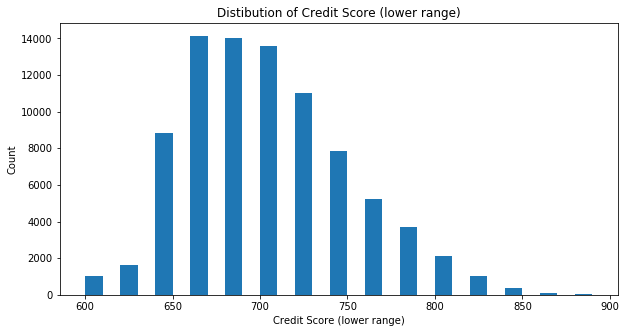

In [19]:
# Plott the distibution of 'CreditScoreRangeLower'
plt.figure(figsize = (10,5))
bin = np.arange(600, 900, 10)
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bin);
plt.xlabel('Credit Score (lower range)')
plt.ylabel('Count')
plt.title('Distibution of Credit Score (lower range)');

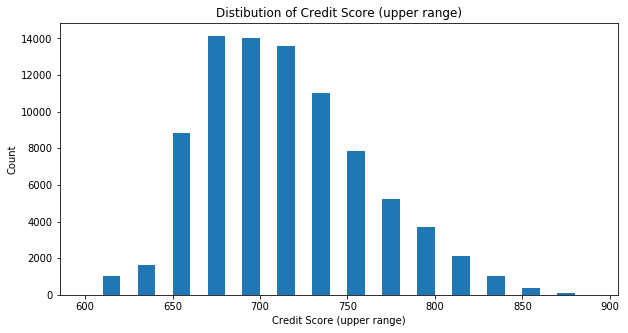

In [20]:
# Plott the distibution of CreditScoreRangeUpper'
plt.figure(figsize = (10,5))
bin = np.arange(600, 900, 10)
plt.hist(data = df, x = 'CreditScoreRangeUpper', bins = bin);
plt.xlabel('Credit Score (upper range)')
plt.ylabel('Count')
plt.title('Distibution of Credit Score (upper range)');

The distribution of both values looks similar, that's why I will take average value of both columns

In [21]:
# Add a column with an average of two values (upper and lower) and leave only this column
df['CreditScore'] = (df.CreditScoreRangeLower + df.CreditScoreRangeUpper) /2
df.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

In [22]:
# Check the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 25 columns):
index                   84853 non-null int64
ListingKey              84853 non-null object
ListingCreationDate     84853 non-null object
Term                    84853 non-null category
LoanStatus              84853 non-null category
BorrowerAPR             84853 non-null float64
ProsperRating           84853 non-null category
ProsperScore            84853 non-null category
ListingCategory         84853 non-null category
BorrowerState           84853 non-null object
Occupation              83520 non-null object
EmploymentStatus        84853 non-null category
IsBorrowerHomeowner     84853 non-null bool
IncomeRange             84853 non-null category
IncomeVerifiable        84853 non-null bool
StatedMonthlyIncome     84853 non-null float64
TotalProsperLoans       84853 non-null float64
LoanOriginalAmount      84853 non-null int64
LoanOriginationDate     84853 non-null datetime64[ns

## Univariate Exploration

- What is the distribution of BorrowerAPR?

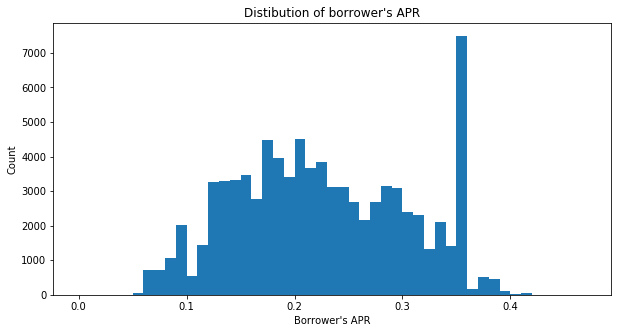

In [23]:
# Plot the distrubution of BorrowerAPR
plt.figure(figsize = (10,5))
bin = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin);
plt.xlabel("Borrower's APR")
plt.ylabel('Count')
plt.title("Distibution of borrower's APR");

BorrowerAPR distribution looks normal (with the mean around 22%) except peak of around 36%. Most of the loans are in 10-35%

##### Let's dig into listing and loan data
- What is the distribution of loan period?

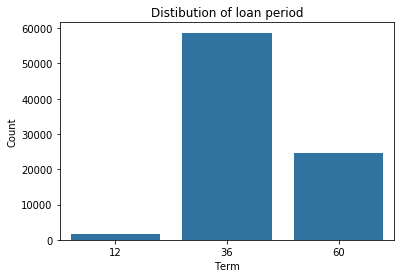

In [24]:
# Plot the distrubution of Term
sns.countplot(data = df, x='Term', color = base_color);
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distibution of loan period');

36 months is the most common loan period

- What is the distribution of loan status?

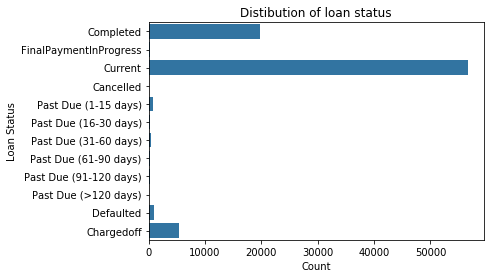

In [25]:
# Plot the distribution of loan status
sns.countplot(data = df, y='LoanStatus', color = base_color);
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.title('Distibution of loan status');

Current and completed loans make up the majority of the data set. However, charged-off loans also have a large amount. We see that there are not a lot of delinquencies.

- What is the distribution of Loan amount?

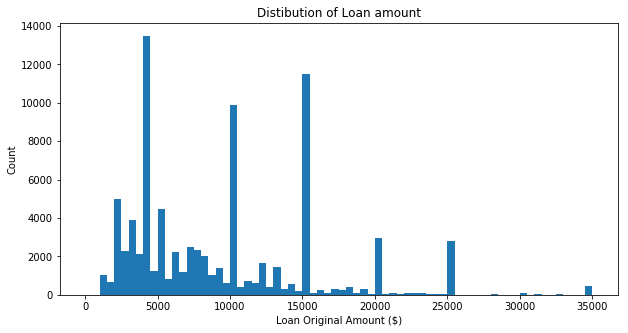

In [26]:
# Plot the distribution of loan amount
plt.figure(figsize = (10,5))
bin = np.arange(0, df.LoanOriginalAmount.max()+100, 500)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin);
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title('Distibution of Loan amount');

We see that there are three main peaks: 4000$, 10000$ and 15000$

- What is the main purpose of the loan?

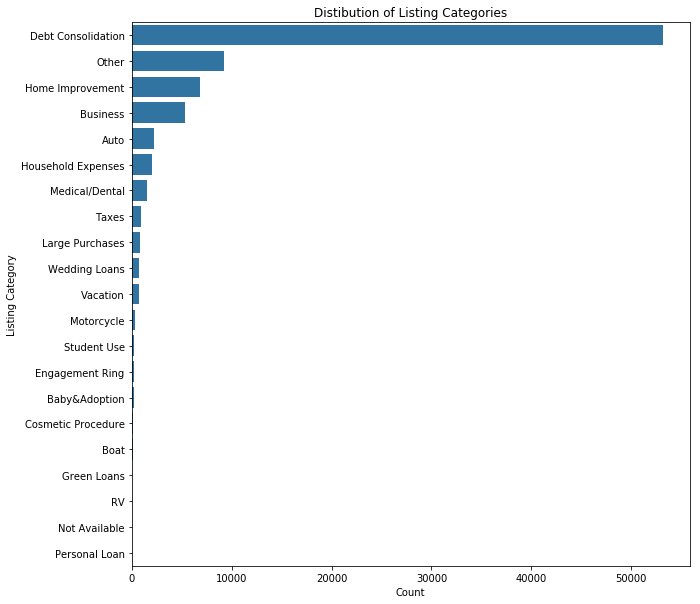

In [27]:
# Order categories
cat_count = df.ListingCategory.value_counts()
cat_index = cat_count.index

# Plot the distribution of listing categories
plt.figure(figsize = (10,10))
sns.countplot(data = df, y='ListingCategory', color = base_color, order = cat_index);
plt.xlabel('Count')
plt.ylabel('Listing Category')
plt.title('Distibution of Listing Categories');

From the distibutione above we see that borrowers use Prosper service for debt consolidations. 

- What is the distribution of Prosper Score and Rating?

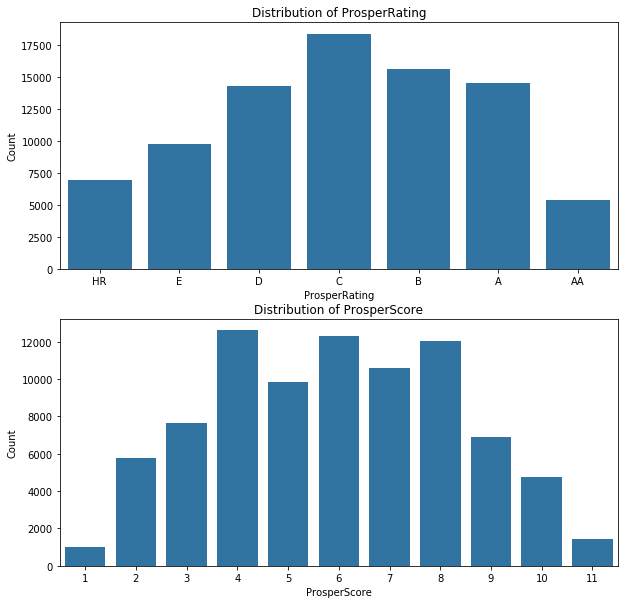

In [28]:
# Plot 2 distributions of Prosper Score and Rating
fig, ax = plt.subplots(nrows = 2, figsize = (10,10))
ProsperRS = ['ProsperRating', 'ProsperScore']

for i in range(len(ProsperRS)):
    var = ProsperRS[i]
    g = sns.countplot(data = df, x = var, ax = ax[i], color=base_color)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('Count')
    ax[i].set_title('Distribution of {}'.format(var))

Both distributions are practically normal, except Prosper Score has 3 equal peaks: 4, 6, and 8. 
The Prosper Rating distribution is skewed to the right a little bit that can be explained by politics of Prosper not to have risk assets.

- How the activity of the company changed over the years and how the activity of borrowers is distributed during the year?

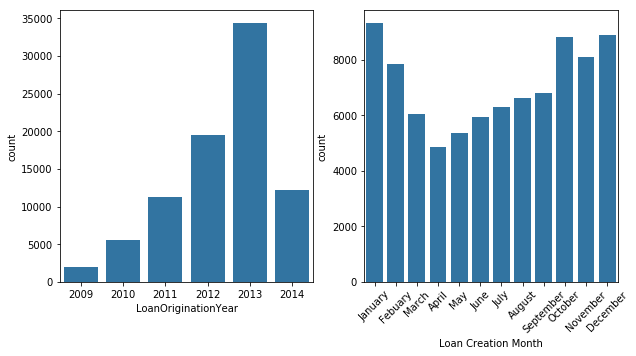

In [29]:
# Plot 2 distributions (monthly, yearly)
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))
sns.countplot(x=df.LoanOriginationYear, color=base_color, ax=ax[0])
plt.xlabel('Loan Creation Year')

sns.countplot(x=df.LoanOriginationMonth, color=base_color, ax=ax[1])
plt.xlabel('Loan Creation Month')
plt.xticks(rotation=45);

In [30]:
df.LoanOriginationDate.max()

Timestamp('2014-03-12 00:00:00')

We see that the number of loans is growing almost doubling every year. The last date in dataset is March 12, 2014 and we can be sure that if the dynamics remain unchanged, the number of loans will be significantly higher than in 2013.
During the year, the major activity falls on the autumn-winter period when approaching the end of the calendar year. Activity in January is most likely due to the completion of procedures started in the previous year.

##### Let's look into borrower's profile
- What is typical employment status of the Borrower?

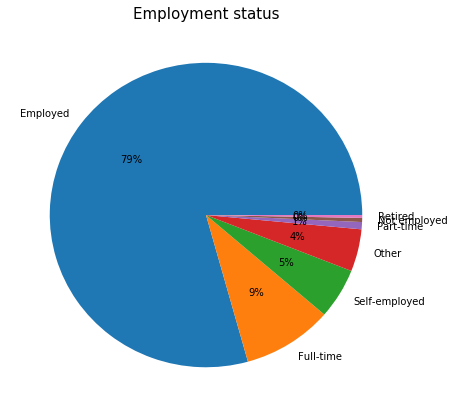

In [31]:
# Plot pie chart of employment status
plt.figure(figsize = [7,7])
labels = ['Employed', 'Full-time', 'Self-employed', 'Other', 'Part-time', 'Not employed', 'Retired']
plt.pie(df.EmploymentStatus.value_counts(), labels = labels, autopct='%1.0f%%')
plt.title('Employment status', fontsize = 15);

The majority (~80%) of borrowers are employed.

- How borrowers are distributed by state?

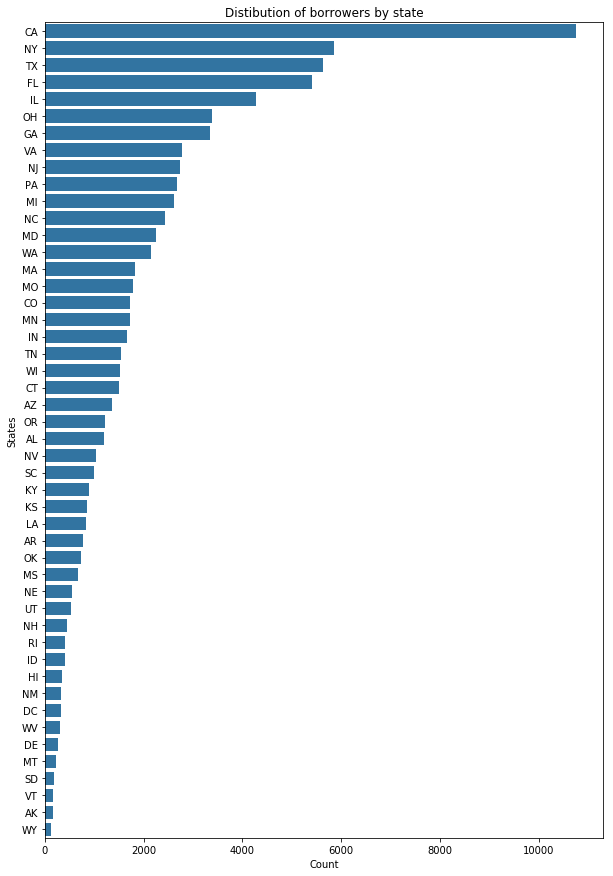

In [32]:
# Order categories
states_count = df.BorrowerState.value_counts()
states_index = states_count.index

# Plot distribution of borrowers by state
plt.figure(figsize = (10,15))
sns.countplot(data = df, y='BorrowerState', color = base_color, order = states_index);
plt.xlabel('Count')
plt.ylabel('States')
plt.title('Distibution of borrowers by state');

The distribution shows that borrowers mainly represent economically active states (primarily California, then New York, Texas and Florida).

- What is distribution of borrowers income?

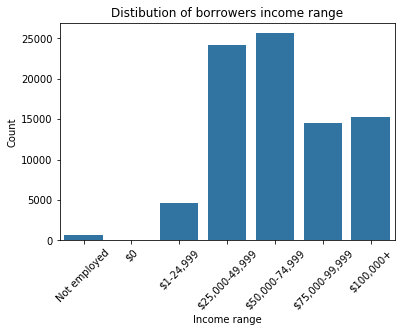

In [33]:
# Plot the income range distribution
ax = sns.countplot (x=df.IncomeRange, color=base_color)
plt.xlabel('Income range')
plt.ylabel('Count')
plt.title('Distibution of borrowers income range');
plt.xticks(rotation = 45);


Most of the borrowers has income in $25-75K range

- What is borrowers occupation?

In [34]:
# First let's see the list
df.Occupation.value_counts()

Other                                 21317
Professional                          10542
Executive                              3468
Computer Programmer                    3236
Teacher                                2888
Analyst                                2735
Administrative Assistant               2708
Accountant/CPA                         2574
Sales - Commission                     2350
Skilled Labor                          2180
Nurse (RN)                             2159
Clerical                               2116
Sales - Retail                         2029
Retail Management                      2001
Truck Driver                           1366
Construction                           1326
Police Officer/Correction Officer      1277
Laborer                                1217
Civil Service                          1139
Engineer - Mechanical                  1135
Food Service Management                1005
Engineer - Electrical                   900
Medical Technician              

Two major positions are 'Other' and 'Professional' (38%) which are not specific, so it’s better to look into distribution without them. 

In [35]:
(21317 + 10542)/df.Occupation.count()

0.38145354406130266

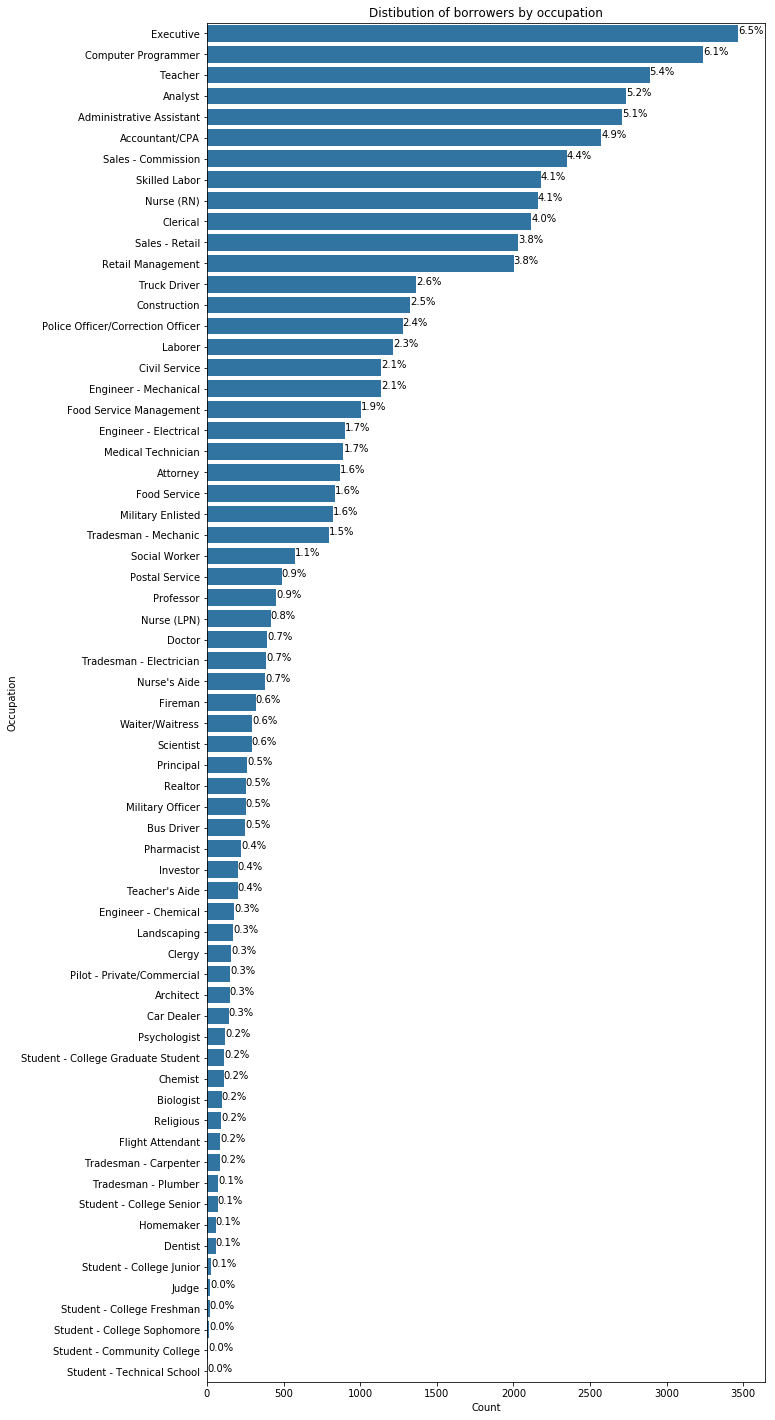

In [36]:
# Plot distibution of borrowers occupation without 'Other' and 'Professional' 
occupation_list = ['Other', 'Professional']
borower_occupation = df['Occupation']
borower_occupation = borower_occupation[borower_occupation.isin(occupation_list) == False]

# Order positions
occupation_count = borower_occupation.value_counts()
occupation_index = occupation_count.index


# Plot distribution of borrowers by occupation
plt.figure(figsize = (10,25))
plot_occupation = sns.countplot(data = borower_occupation, y=borower_occupation, color = base_color, order = occupation_index);
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Distibution of borrowers by occupation')

# Add percentages for easier analyze
total = len(borower_occupation)
for p in plot_occupation.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        plot_occupation.annotate(percentage, (x, y))

plt.show();


We see that Prosper company has a wide range of occupation types of their borrowers, not counting almost 40% of borrowers who are not specialized in any way and are grouped into general classes ('Other' and 'Professional')

- What is the distribution of recommendations

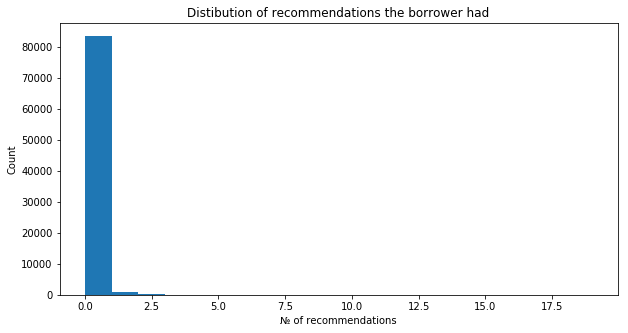

In [37]:
# Plot the distribution of recommendations
plt.figure(figsize = (10,5))
bin = np.arange(0, df.Recommendations.max()+1, 1)
plt.hist(data = df, x = 'Recommendations', bins = bin);
plt.xlabel('№ of recommendations')
plt.ylabel('Count')
plt.title('Distibution of recommendations the borrower had');

We see that mostly nobody had reccomendations at the time the listing was created, that's why this indicator is not relevant.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. BorrowerAPR distribution looks normal (with the mean around 22%) except peak of around 36%. Most of the loans are in 10-35%
2. We can preliminarily say that Prosper is a conservative company in its decision to issue a loan: 1. the distribution of the credit score is right skewed, below a particular score (around 640) loans are almost never issued; 2. most loans are issued for debt consolidation; 3. most clients are employed, live in economically developed states (California, New York, Texas, Florida), have an income in the range of $25-75K.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the analysis, I changed types for several valuables (date and categorical) and also took the data from July 2009 when Prosper issued their Rating system.

## Bivariate Exploration

- How borrower's APR depends on Prosper score, rating and credit score?

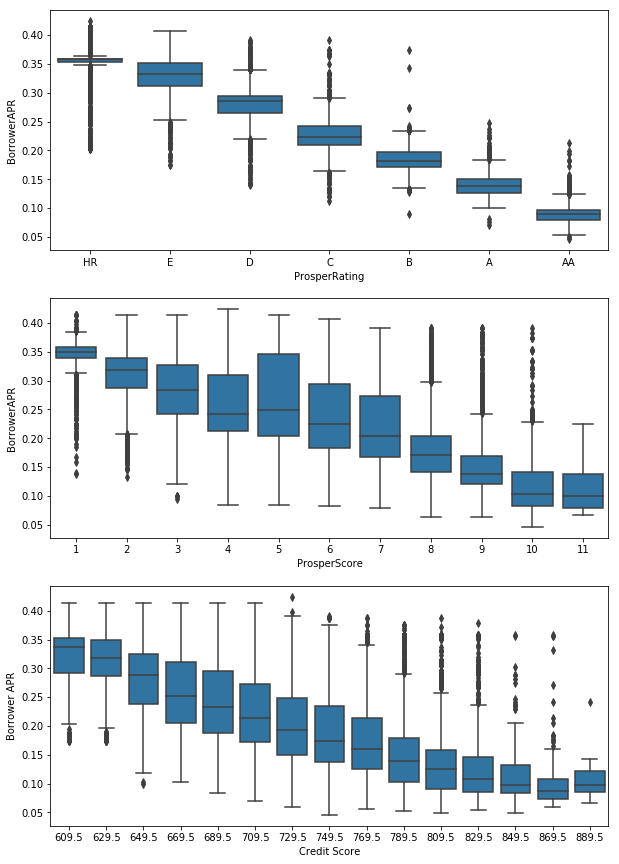

In [38]:
# plot the correlation between borrower's APR and Prosper score/rating
fig, ax = plt.subplots(nrows = 3, figsize = (10,15))
sns.boxplot(x=df.ProsperRating, y=df.BorrowerAPR, color=base_color, ax=ax[0])
plt.xlabel('Prosper rating')
plt.ylabel('Borrower APR');

sns.boxplot(x=df.ProsperScore, y=df.BorrowerAPR, color=base_color, ax=ax[1])
plt.xlabel('Prosper score')
plt.ylabel('Borrower APR');

sns.boxplot(x=df.CreditScore, y=df.BorrowerAPR, color=base_color, ax=ax[2])
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR');

Despite the fact that we see an almost direct relationship between the borrower's APR and the borrower's scores (Prosper's rating, Proper and Credit  scores), we can argue that these values are not the only ones that determine the interest rate of a loan. In all three graphs, for each value, we see a wide range of APR values. Also, for some values (prosper score "5", credit score "890") the average borrower's APR was even higher than for the previous value.

- How borrower's APR depends on borrower's income and loan term?

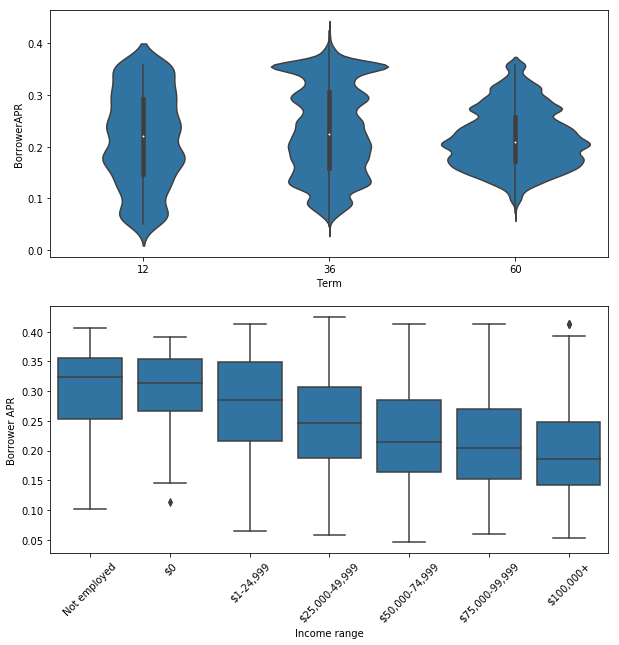

In [39]:
# plot the correlation between borrower's APR and borrower's income and loan term
fig, ax = plt.subplots(nrows = 2, figsize = (10,10))
sns.violinplot(x=df.Term, y=df.BorrowerAPR, color=base_color, ax=ax[0])
plt.xlabel('Term (months)')
plt.ylabel('Borrower APR')

sns.boxplot(x=df.IncomeRange, y=df.BorrowerAPR, color=base_color, ax=ax[1])
plt.xlabel('Income range')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 45);

As expected for not employed and borowers with less income annual percentage rate is bigger.
On average, the interest rate for loans issued for a longer period is lower than for short-term loans, but a few things stand out: 1) we see several peaks for 36 months loans and the biggest peak for the biggest rate; 2) for 60 months loans we have one main peak; 3) for 12 months loans the ditribution is without peaks so this term doesn't correlate with APR.

- How empoyment status and home ownership influence on borrower's APR?

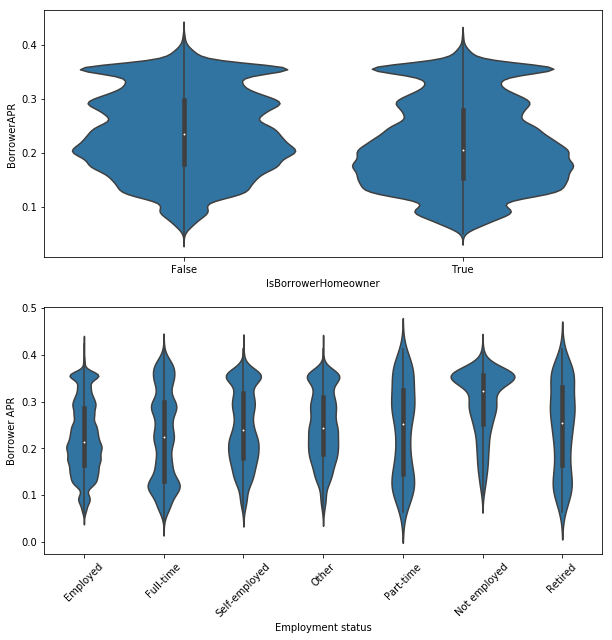

In [40]:
# plot the correlation between borrower's APR and empoyment status
fig, ax = plt.subplots(nrows = 2, figsize = (10,10))
sns.violinplot(data = df, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color, ax=ax[0])
plt.xlabel('Is borrower homeowner')
plt.ylabel('Borrower APR')

sns.violinplot(data = df, x='EmploymentStatus', y='BorrowerAPR', color=base_color, ax=ax[1])
plt.xlabel('Employment status')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 45);

Ownership of real estate reduces the risks for the lender. Same works for the employment status: employed borrowers tend to have lower APR. 

- Does the borrowers who own home got higher ratings?

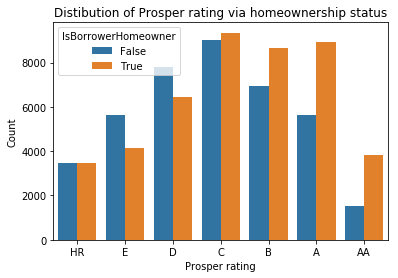

In [41]:
# Plot the Prosper rating distribution via homeownership status
sns.countplot(data=df, x='ProsperRating', hue='IsBorrowerHomeowner')
plt.xlabel('Prosper rating')
plt.ylabel('Count')
plt.title('Distibution of Prosper rating via homeownership status');

As expected, those borrowers who own home get higher rating.

- How occupation and purposes of the loan affect on APR?

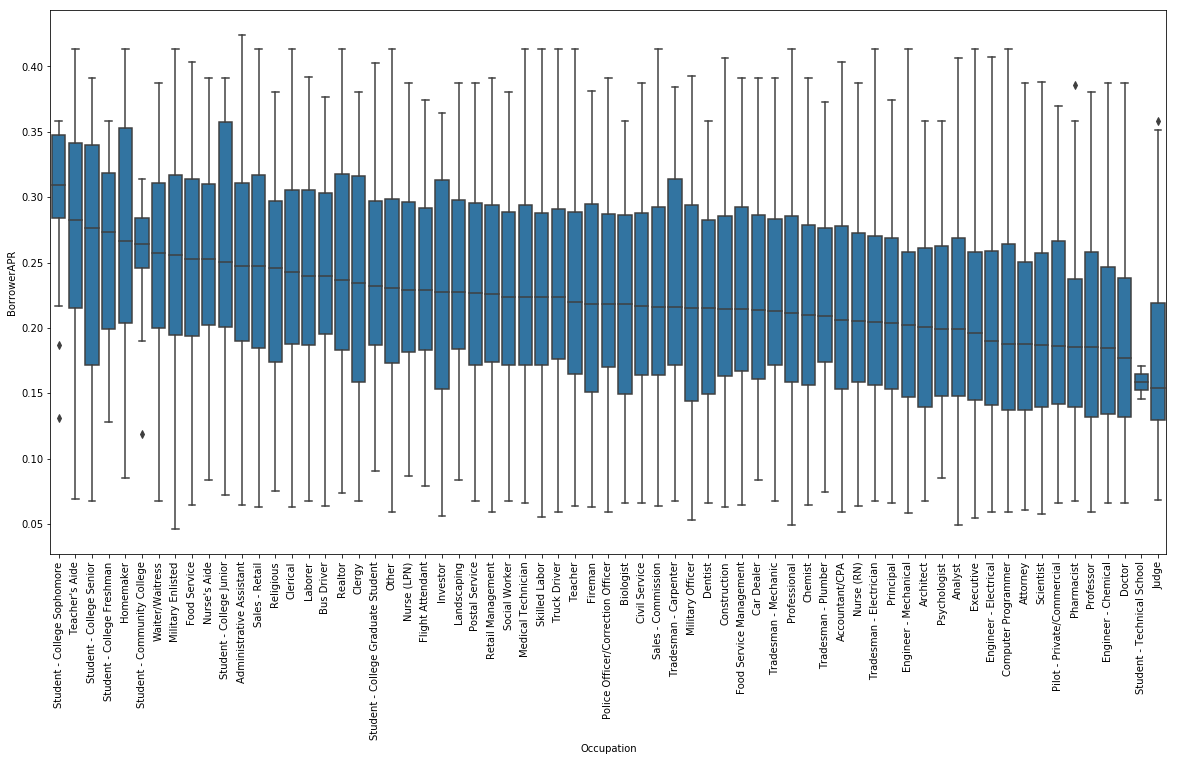

In [42]:
# plot the correlation between borrower's APR and empoyment occupation

listing_category_order = df.groupby('Occupation')['BorrowerAPR'].median().sort_values(ascending = False).index
plt.figure(figsize = [20, 10])
sns.boxplot(data = df, y = 'BorrowerAPR', x = 'Occupation', color = base_color, order=listing_category_order)
plt.xticks(rotation = 90);

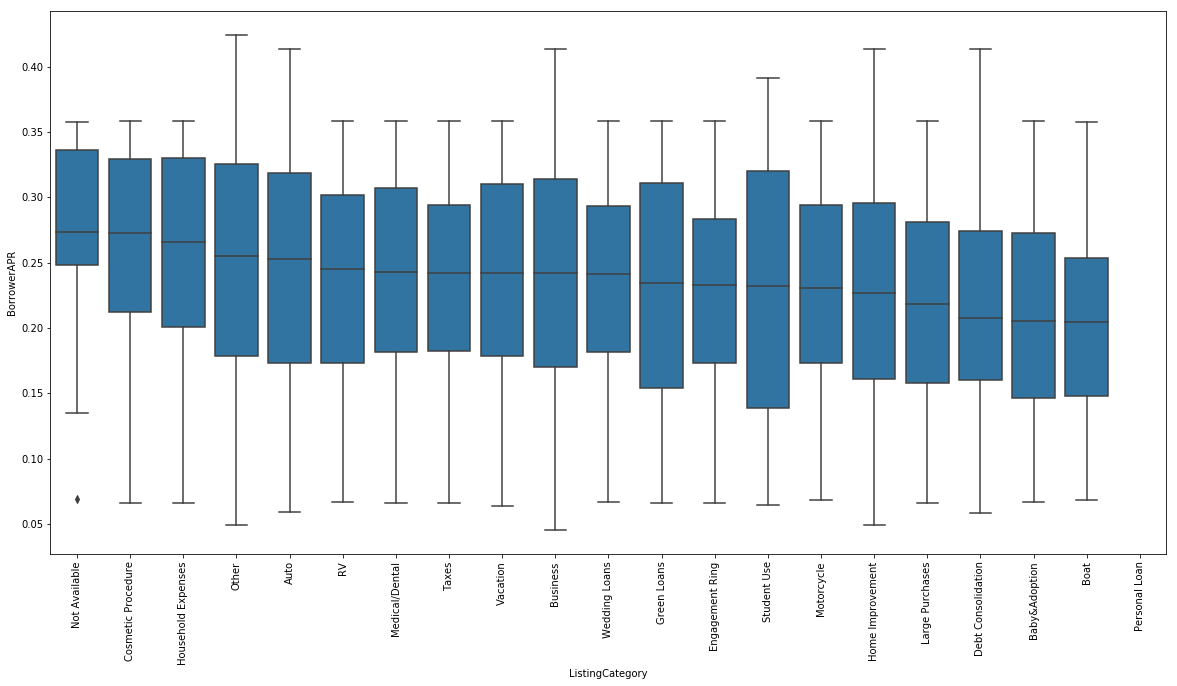

In [43]:
# plot the correlation between borrower's APR and purposes of the loan

listing_category_order = df.groupby('ListingCategory')['BorrowerAPR'].median().sort_values(ascending = False).index
plt.figure(figsize = [20, 10])
sns.boxplot(data = df, y = 'BorrowerAPR', x = 'ListingCategory', color = base_color, order=listing_category_order)
plt.xticks(rotation = 90);

1. Highly qualified borrowers receive better loan offers. Loans for students for a technical school are allocated separately, a narrow spread of values shows that there is apparently some kind of specialized lending program for them.
2. Loan purposes alone have little effect on APR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In general, it can be seen that the borrower's APR value determines not only the Prosper Rating or Credit Score, but also depends on many parameters (borrower's income, employment status, home ownership and others).

## Multivariate Exploration


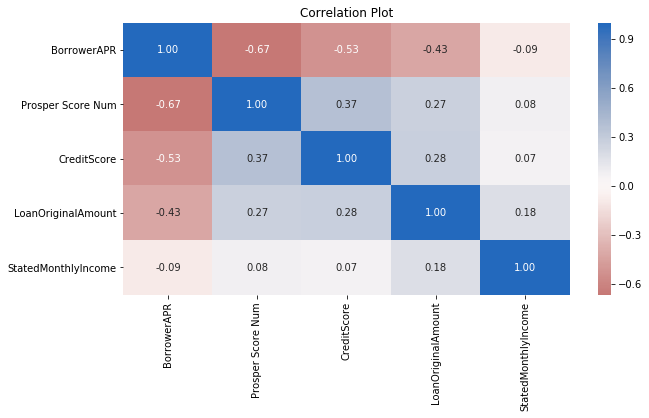

In [44]:
# plot heatmap to look on correlations between borrower's APR and other numerical variables
cor_vars = ['BorrowerAPR', 'Prosper Score Num', 'CreditScore', 'LoanOriginalAmount', 'StatedMonthlyIncome']
plt.figure(figsize = [10, 5])
sns.heatmap(df[cor_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);
plt.title("Correlation Plot");

Borrower's APR most strong correlation is with Prosper Score/ Credit score (we see that Prosper company is more focused on its own rating) and loan amount. It is noteworthy that monthly income does not greatly affect borrower's APR.

Let's digress for a moment from multivariate exploration and dive deep into correlation between borrower's APR and monthly income

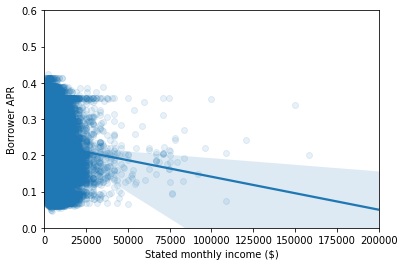

In [45]:
# Plot a scatter plot 
sns.regplot(data=df, x="StatedMonthlyIncome", y="BorrowerAPR", x_jitter=100, scatter_kws={'alpha':1/10})
plt.xlim(0, 200000)
plt.ylim(0, 0.6)
plt.xlabel('Stated monthly income ($)')
plt.ylabel('Borrower APR');

Despite a certain negative relationship between the borrower's APR and monthly income, we see that the spread of values is too large (for example, for monthly income more than $50K, most points are above a linear relationship). 

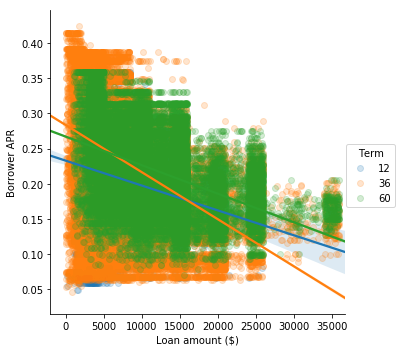

In [46]:
# Use multiple linear regression to see the correlation between borrower's APR and loan amount across terms 
g = sns.lmplot(data=df, x="LoanOriginalAmount", y="BorrowerAPR", hue="Term", x_jitter=1000, scatter_kws={'alpha':1/5})
g.set_axis_labels("Loan amount ($)", "Borrower APR");

We see negative correlation between loan amount and APR which is stronger for 36 months term. It is noteworthy that for short-term loans (12 months) APR is on average lower than for long-term loans (60 months).That's odd.

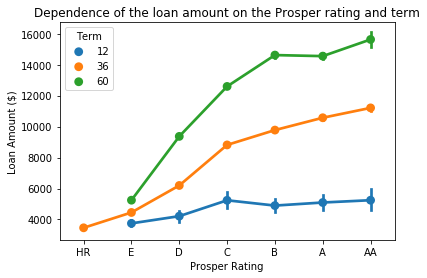

In [47]:
# plot loan amount vs prosper rating across terms
sns.pointplot(data = df, x='ProsperRating', y='LoanOriginalAmount', hue='Term')
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Amount ($)')
plt.title('Dependence of the loan amount on the Prosper rating and term');

As expected, short-term loans are for smaller credits and amount of the loan doesn't raise with the better ratings. And loan amount grows with the increase of the Prosper rating.

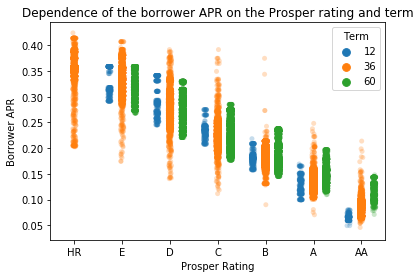

In [48]:
# plot borrower's APR vs prosper rating across terms
sns.stripplot(data = df, x='ProsperRating', y='BorrowerAPR', dodge=True, hue='Term', jitter=True, alpha=.25)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Dependence of the borrower APR on the Prosper rating and term');

As mentioned above there is a little odd situation where borrowers (especially with high ratings) got higher APR for a long term loan.

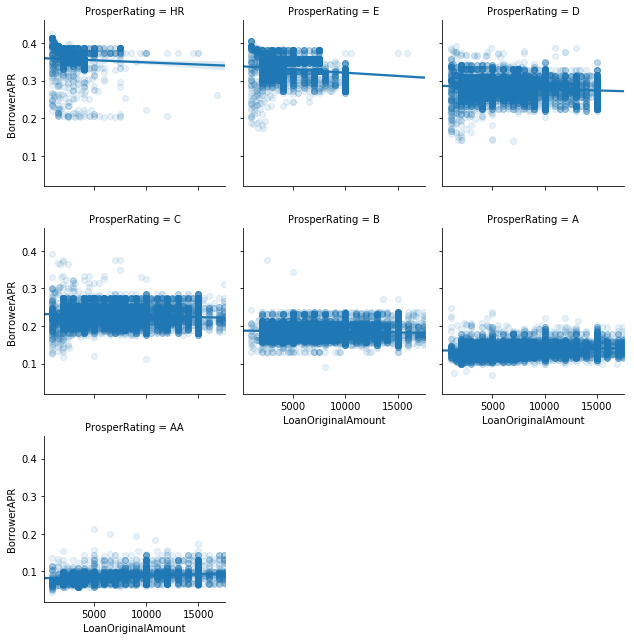

In [49]:
# Use FacetGrid to look deeply on correlation between Prosper rating, borrower's APR and loan amount
g = sns.FacetGrid(data = df, col = 'ProsperRating', col_wrap=3 )
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'alpha':0.1});

For lower ratings (E and HR), it's hard to get a loan for more than $10000, and the APR will be high (20-40%). For high-rated borrowers, we see that APR doesn't depend on the loan amount. But it is striking that for high-rated borrowers APR for bigger loans even increasing. On the contrary, the low-rated borrowers get lower APR for a bigger loan.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As expected, Prosper adheres to a conservative policy when issuing loans: the most favorable conditions are received by highly rated borrowers with high incomes and owners of real estate.

### Were there any interesting or surprising interactions between features?

> Despite the correlation between borrower's APR and income range (for not employed and borrowers with less income, annual percentage rates are more significant), we see that monthly income weakly influences APR.

## Conclusions
	
1. Despite the fact that we see an almost direct relationship between the borrower's APR and the borrower's scores (Prosper's rating or Credit scores), we can argue that these values are not the only ones that determine the interest rate of a loan. A significant impact on the borrower's APR is affected by the amount of the loan, but taking into account other factors.
2. Despite the correlation between borrower's APR and income range (for not employed and borrowers with less income, annual percentage rates are more significant), we see that monthly income weakly influences APR. 
3. For lower ratings (E and HR), it's hard to get a loan for more than $10000, and the APR will be high (20-40%). For high-rated borrowers, we see that APR doesn't depend on the loan amount. But it is striking that for high-rated borrowers APR for bigger loans even increasing. On the contrary, the low-rated borrowers get lower APR for a bigger loan. Let's assume that this is due to company policy. Higher-ranked customers are more likely to be long-term and loyal to the brand (which is also confirmed by the higher APR for the credit rating of "890" compared to "870"). Customers with low ratings are primarily new clients, so the company is trying to attract them with a low APR.
4. Ownership of real estate reduces the risks for the lender. Same works for the employment status: employed borrowers tend to have lower APR. Highly qualified borrowers receive better loan offers. Loans for students for a technical school are allocated separately, a narrow spread of values shows that there is apparently some kind of specialized lending program for them.
